In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textwrap import wrap
from IPython.display import display
%matplotlib inline

df = pd.read_csv(r'C:\Users\Patrick Tawil\Desktop\me_irl\Stats\Datasets\menu.csv', sep=',', encoding='latin1')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


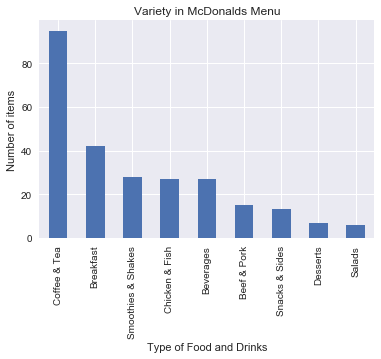

In [2]:
#Turns out McDonalds has a greater variety in Hot Beverages and Breakfast over actual burgers
print(df["Category"].value_counts())
variety = df["Category"].value_counts().plot(kind="bar");

#Styling
sns.set_style("darkgrid")
variety.set_title("Variety in McDonalds Menu")
variety.set_xlabel("Type of Food and Drinks")
variety.set_ylabel("Number of items");

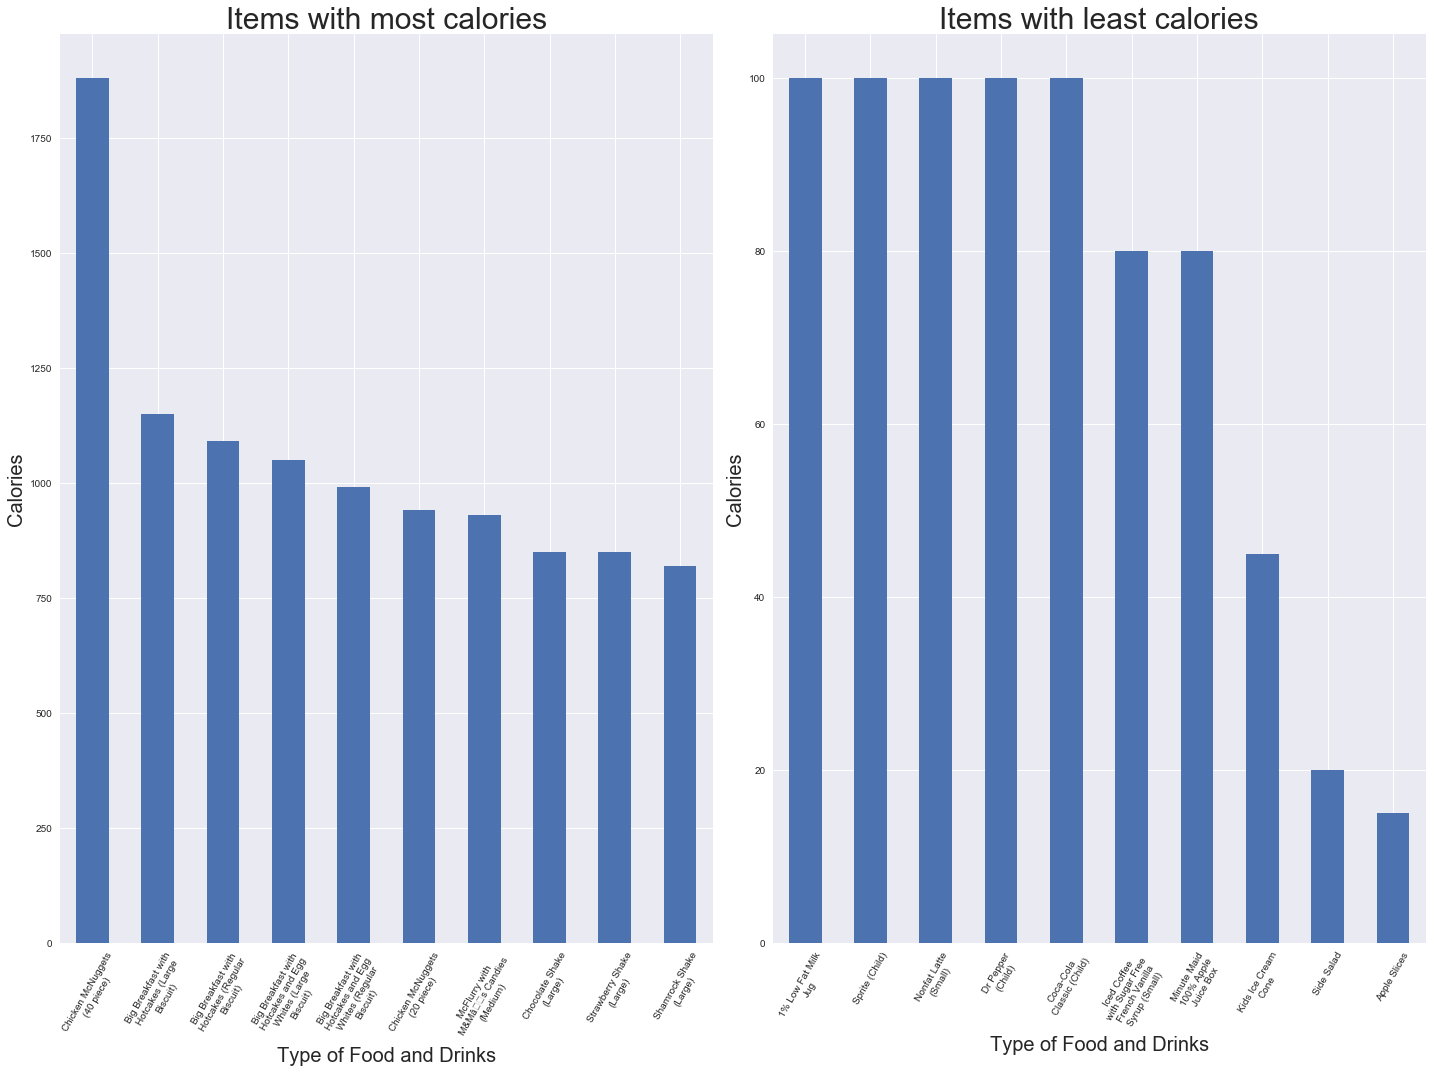

In [3]:
#Initializing a new DataFrame that is sorted by Most to Least Calories
sorted_by_calories_df = df.sort_values(by="Calories",ascending=False)

#Setting up the subplots
f, ax = plt.subplots(1, 2)

#Lets find out the top 10 items that have the most calories
most_calories = sorted_by_calories_df[:10]
most_calories["Calories"].plot(kind="bar",ax=ax[0],figsize=(20,15))

#Lets find out the top 10 items that have the least calories that aren't "Diet" or Coffee/Tea Beverages since they're 0 calories
not_empty = sorted_by_calories_df["Calories"] > 0
least_calories = sorted_by_calories_df[not_empty][-10:]
least_calories["Calories"].plot(kind="bar",ax=ax[1])


#Labels and style
most_labels= most_calories["Item"]
fixed_most_labels = [ '\n'.join(wrap(l_most, 19)) for l_most in most_labels ]

least_labels = least_calories["Item"]
fixed_least_labels = [ '\n'.join(wrap(l_least, 15)) for l_least in least_labels ]

ax[0].set_title("Items with most calories", fontsize=30)
ax[0].set_xlabel("Type of Food and Drinks", fontsize=20)
ax[0].set_ylabel("Calories",fontsize=20)
ax[0].set_xticklabels(fixed_most_labels, rotation = 60)
ax[1].set_title("Items with least calories",fontsize=30)
ax[1].set_xlabel("Type of Food and Drinks",fontsize=20)
ax[1].set_ylabel("Calories",fontsize=20)
ax[1].set_xticklabels(fixed_least_labels, rotation = 60)

plt.tight_layout();

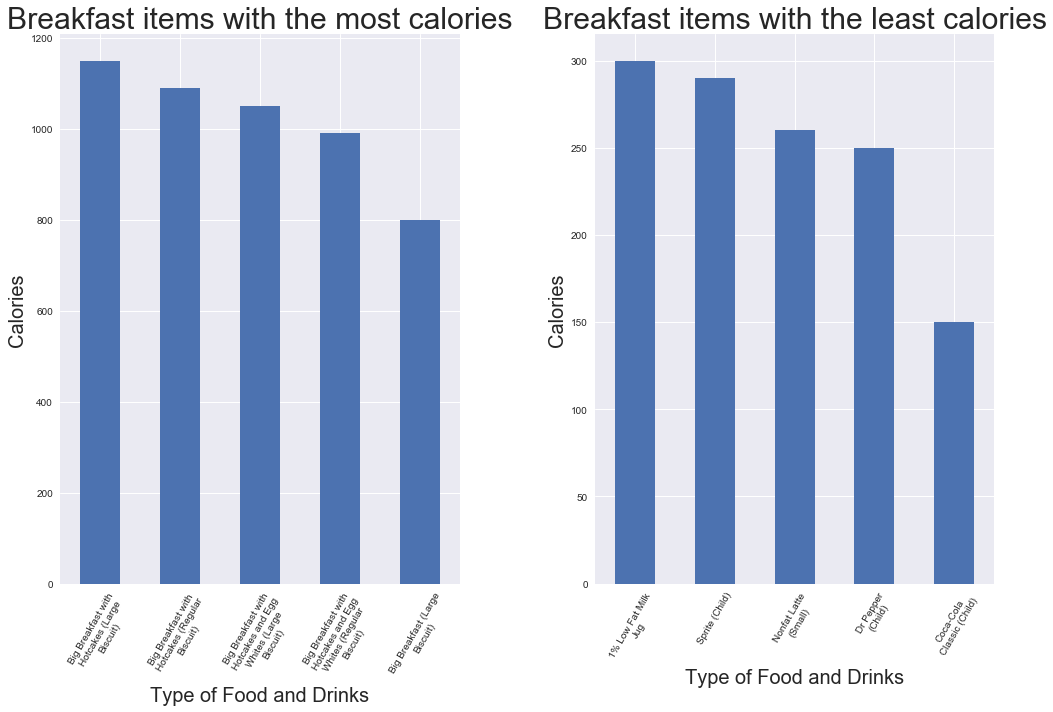

In [4]:
#What is the fattiest breakfast you could eat at McDonalds?

#Subplots
f, ax = plt.subplots(1, 2)

#One with the most calories
breakfast_items = sorted_by_calories_df["Category"] == "Breakfast"
most_breakfast_calories = sorted_by_calories_df[breakfast_items][:5]
most_breakfast_calories["Calories"].plot(kind="bar", figsize=(15,10), ax=ax[0])

#One with the least calories. As we can see nothing is around 300 Calories and they're only drinks, not real breakfast material
not_empty_breakfast = sorted_by_calories_df[breakfast_items & not_empty]
least_breakfast_calories = not_empty_breakfast[-5:]
least_breakfast_calories["Calories"].plot(kind="bar", ax=ax[1])

#Labels and style
breakfast_labels= most_breakfast_calories["Item"]
fixed_mostcal_breakfast_labels = [ '\n'.join(wrap(l_most, 20)) for l_most in breakfast_labels ]

least_labels = least_calories["Item"]
fixed_least_labels = [ '\n'.join(wrap(l_least, 15)) for l_least in least_labels ]

ax[0].set_title("Breakfast items with the most calories", fontsize=30)
ax[0].set_xlabel("Type of Food and Drinks", fontsize=20)
ax[0].set_ylabel("Calories",fontsize=20)
ax[0].set_xticklabels(fixed_mostcal_breakfast_labels, rotation = 60)
ax[1].set_title("Breakfast items with the least calories",fontsize=30)
ax[1].set_xlabel("Type of Food and Drinks",fontsize=20)
ax[1].set_ylabel("Calories",fontsize=20)
ax[1].set_xticklabels(fixed_least_labels, rotation = 60)


plt.tight_layout()

In [5]:
#Now lets look at a standard Big Mac Meal with Small, Medium and Large Fries+Coke
pd.options.display.max_columns = None

#Nutritional Value of a Big Mac
display(df[df["Item"]=="Big Mac"])

#Seems pretty healthy, only 530 Calories, however there is more than meets the eye when you add in fries and a drink.
#Lets also take a look at Calories from fat. Experts say fat intake should be 30% of your total daily calories 
#(http://www.healthcentral.com/cholesterol/c/question/596084/55051/) However with the Big Mac nearly half of
#your calories come from fat.

#Now lets look at fries
display(df[df["Item"].str.contains("French Fries")])

#And lets look at a standard Coke
display(df[df["Item"].str.contains("Coca")])


#Lets add everything up
print("Large Big Mac Meal:\n1320 Calories\n460 Calories from Fat\nAbout 35% of your daily fat intake\n")
print("Medium Big Mac Meal:\n1070 Calories\n380 Calories from Fat\nAbout 35% of your daily fat intake\n")
print("Small Big Mac Meal:\n900 Calories\n340 Calories from Fat\nAbout 38% of your daily fat intake\n")
print("Kids Big Mac Meal:\n740 Calories\n290 Calories from Fat\nAbout 39% of your daily fat intake\n")

#Those values seem somewhat reasonable. Also it would seem that the smaller the meal the more calories from fat you gain
#however the only reason it would seem that way is the soda which makes the total calories much higher than it truly is
#In reality considering the actual Food, ignoring the drink (or just getting a water) we can see how much the burger and fries
#affects your % of daily intake
print("Large Big Mac + Fries:\n1040 Calories\n460 Calories from Fat\nAbout 44% of your daily fat intake\n")
print("Medium Big Mac + Fries:\n870 Calories\n380 Calories from Fat\nAbout 44% of your daily fat intake\n")
print("Small Big Mac + Fries:\n760 Calories\n340 Calories from Fat\nAbout 45% of your daily fat intake\n")
print("Kids Big Mac + Fries:\n640 Calories\n290 Calories from Fat\nAbout 45% of your daily fat intake\n")

#Furthermore lets look at the saturated fats. The latest Dietary Guidelines for Americans recommends keeping saturated fat 
#to less than 10 percent of calories a day. http://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/expert-answers/fat-grams/faq-20058496
#It is interesting to note that although Fries can have quite a bit of calories they have much less saturated fat than
#the burger.

print("Saturated Fat (% of daily value) in a large meal: 65%")
print("Saturated Fat (% of daily value) in a medium meal: 59%")
print("Saturated Fat (% of daily value) in a small meal: 56%")
print("Saturated Fat (% of daily value) in a kids meal: 49%")

#In order to not go 


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
42,Beef & Pork,Big Mac,7.4 oz (211 g),530,240,27.0,42,10.0,48,1.0,85,28,960,40,47,16,3,13,9,24,6,2,25,25


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
96,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,100,11.0,17,1.5,8,0.0,0,0,130,5,30,10,2,10,0,2,0,30,0,4
97,Snacks & Sides,Medium French Fries,3.9 oz (111 g),340,140,16.0,24,2.5,11,0.0,0,0,190,8,44,15,4,14,0,4,0,45,2,4
98,Snacks & Sides,Large French Fries,5.9 oz (168 g),510,220,24.0,37,3.5,17,0.0,0,0,290,12,67,22,5,22,0,6,0,70,2,8
99,Snacks & Sides,Kids French Fries,1.3 oz (38 g),110,50,5.0,8,1.0,4,0.0,0,0,65,3,15,5,1,5,0,1,0,15,0,2


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,0,0,0,0,28,9,0,0,28,0,0,0,0,0


Large Big Mac Meal:
1320 Calories
460 Calories from Fat
About 35% of your daily fat intake

Medium Big Mac Meal:
1070 Calories
380 Calories from Fat
About 35% of your daily fat intake

Small Big Mac Meal:
900 Calories
340 Calories from Fat
About 38% of your daily fat intake

Kids Big Mac Meal:
740 Calories
290 Calories from Fat
About 39% of your daily fat intake

Large Big Mac + Fries:
1040 Calories
460 Calories from Fat
About 44% of your daily fat intake

Medium Big Mac + Fries:
870 Calories
380 Calories from Fat
About 44% of your daily fat intake

Small Big Mac + Fries:
760 Calories
340 Calories from Fat
About 45% of your daily fat intake

Kids Big Mac + Fries:
640 Calories
290 Calories from Fat
About 45% of your daily fat intake

Saturated Fat (% of daily value) in a large meal: 65%
Saturated Fat (% of daily value) in a medium meal: 59%
Saturated Fat (% of daily value) in a small meal: 56%
Saturated Fat (% of daily value) in a kids meal: 49%


In [6]:
def get_values_from_header(str_contained):
    headers = []
    for header in list(df):
        if str_contained in header:
            headers.append(header)
    return headers

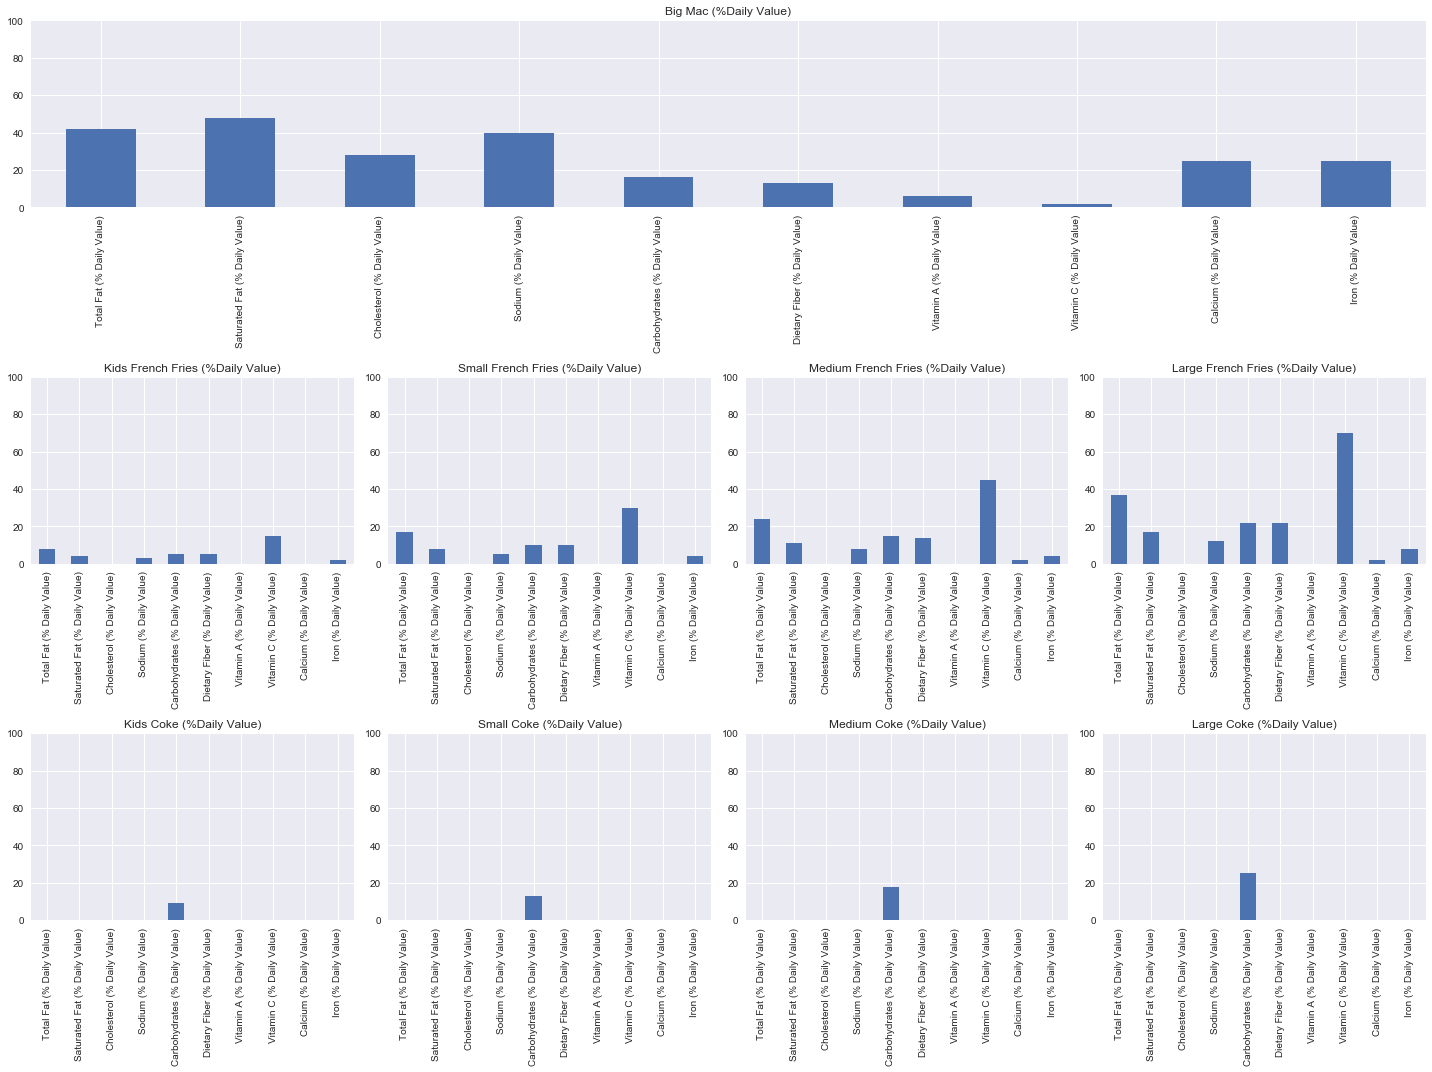

In [7]:
#Starting with Beef and Pork, we will track Calories, Sodium, Carbs, dietary fiber, protein, vitamin A,C, Calcium and Iron

# Set up the matplotlib figure
plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=4)
ax2 = plt.subplot2grid((3, 4), (1, 0))
ax3 = plt.subplot2grid((3, 4), (1, 1))
ax4 = plt.subplot2grid((3, 4), (1, 2))
ax5 = plt.subplot2grid((3, 4), (1, 3))
ax6 = plt.subplot2grid((3, 4), (2, 0))
ax7 = plt.subplot2grid((3, 4), (2, 1))
ax8 = plt.subplot2grid((3, 4), (2, 2))
ax9 = plt.subplot2grid((3, 4), (2, 3))

#Setting limits
ax1.set_ylim(0,100)
ax2.set_ylim(0,100)
ax3.set_ylim(0,100)
ax4.set_ylim(0,100)
ax5.set_ylim(0,100)
ax6.set_ylim(0,100)
ax7.set_ylim(0,100)
ax8.set_ylim(0,100)
ax9.set_ylim(0,100)


#Big Mac %Daily Value
df.loc[42, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax1, title="Big Mac (%Daily Value)")

#French Fries %Daily Value
df.loc[99, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax2, title="Kids French Fries (%Daily Value)")
df.loc[96, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax3, title="Small French Fries (%Daily Value)")
df.loc[97, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax4, title="Medium French Fries (%Daily Value)")
df.loc[98, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax5, title="Large French Fries (%Daily Value)")

#Coca-cola %Daily Value
df.loc[113, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax6, title="Kids Coke (%Daily Value)")
df.loc[110, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax7, title="Small Coke (%Daily Value)")
df.loc[111, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax8, title="Medium Coke (%Daily Value)")
df.loc[112, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax9, title="Large Coke (%Daily Value)")


plt.tight_layout()

In [8]:
"""
Conclusion from a Big Mac Meal:
Although the values may seem reasonable we have to take into consideration that this only constitutes
1/3 of your meals. In 1 meal you get about 50% of your daily fat, saturated fat, carbohydrates,
and sodium intake. Also 40% of cholesterol in a kids' meal. In a large meal you get  80% of your daily
fat intake. Saturated fat, Carbohydrates would be nearing 70%.
"""

"\nConclusion from a Big Mac Meal:\nAlthough the values may seem reasonable we have to take into consideration that this only constitutes\n1/3 of your meals. In 1 meal you get about 50% of your daily fat, saturated fat, carbohydrates,\nand sodium intake. Also 40% of cholesterol in a kids' meal. In a large meal you get  80% of your daily\nfat intake. Saturated fat, Carbohydrates would be nearing 70%.\n"

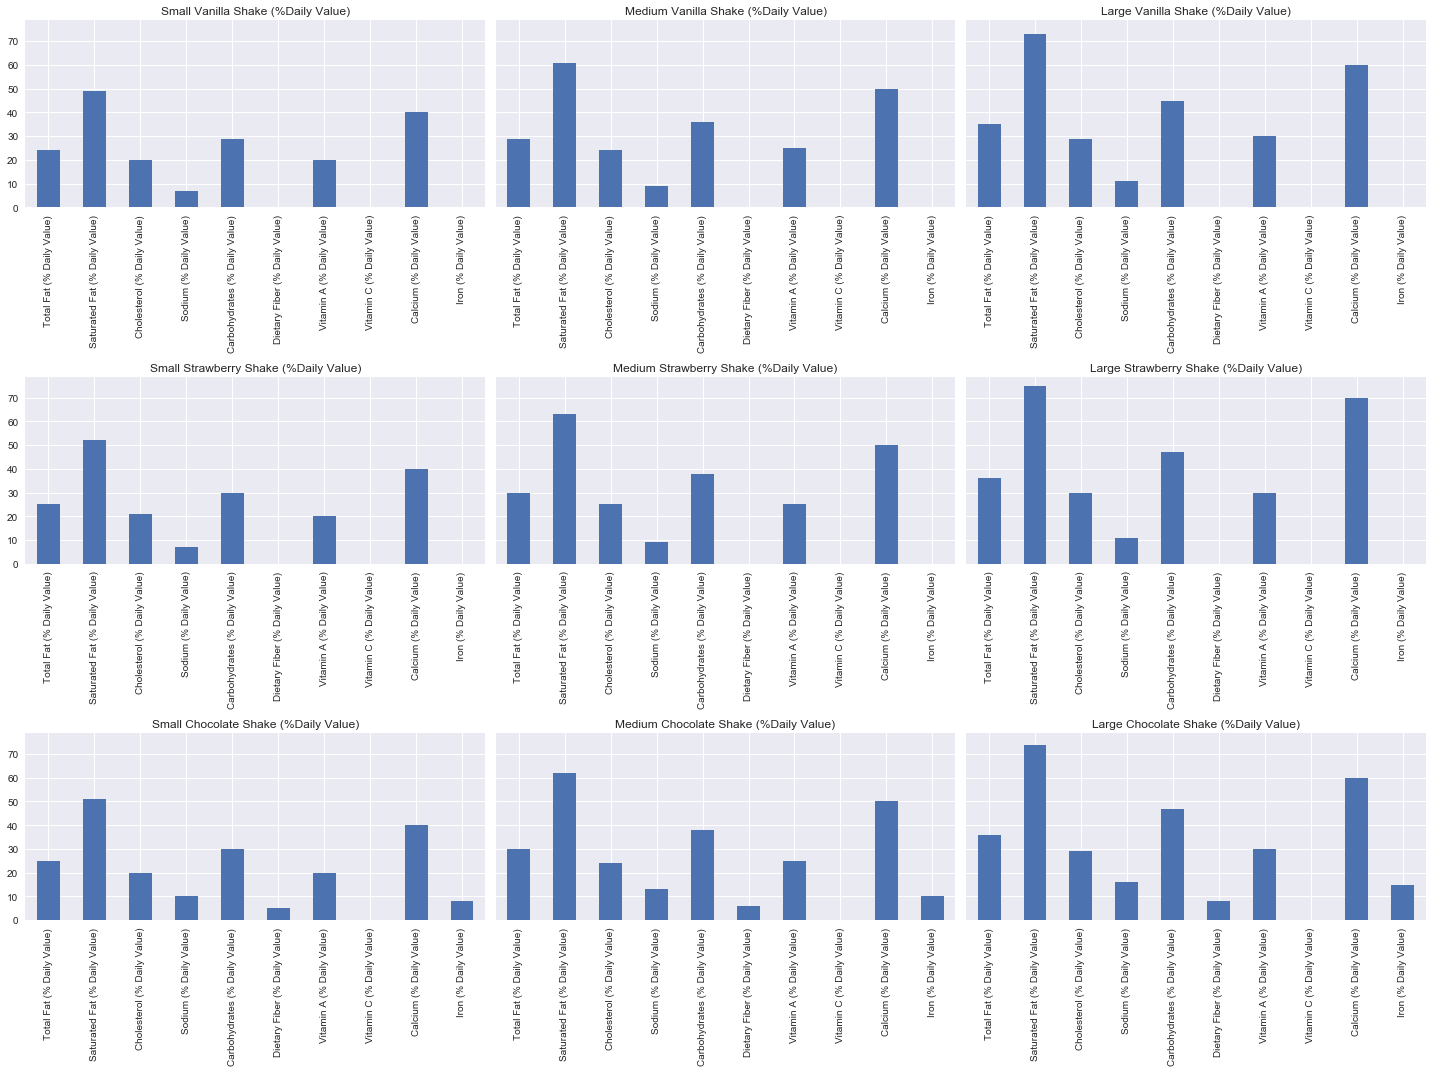

In [9]:
#Now lets take a look at the other drink alternatives that complement a 
#lunch/dinner that people would take instead of soda 

#Choc/Vanilla/Strawberry Milkshakes. Using a bit of Regex we can get those values
shakes_df = df[df["Item"].str.contains("[Vanilla|Chocolate|Strawberry] Shake")]


#Subplots
f, ax = plt.subplots(3, 3, sharey=True, figsize=(20,15))

#Vanilla Shakes %Daily Value
df.loc[241, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[0,0], title="Small Vanilla Shake (%Daily Value)")
df.loc[242, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[0,1], title="Medium Vanilla Shake (%Daily Value)")
df.loc[243, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[0,2], title="Large Vanilla Shake (%Daily Value)")


#Strawberry Shakes %Daily Value
df.loc[244, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[1,0], title="Small Strawberry Shake (%Daily Value)")
df.loc[245, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[1,1], title="Medium Strawberry Shake (%Daily Value)")
df.loc[246, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[1,2], title="Large Strawberry Shake (%Daily Value)")

#Chocolate Shakes %Daily Value
df.loc[247, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[2,0], title="Small Chocolate Shake (%Daily Value)")
df.loc[248, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[2,1], title="Medium Chocolate Shake (%Daily Value)")
df.loc[249, get_values_from_header("(% Daily Value)")].plot(kind="bar",ax=ax[2,2], title="Large Chocolate Shake (%Daily Value)")

f.tight_layout()
